# Reto: Entregable #3
## Evaluación y Refinamiento de modelo

| Integrantes        | Matricula            |
|---------------|---------------|
| Ana Lucía Cárdenas Pérez      | A01284090          |
| Elías Garza Valdés      | A01284041          |
| Diego Elián Rodríguez Cantú      | A00829925          |
| José Edmundo Romo Castillo           | A01197772           |


## Introducción
El propósito de este reto es generar un modelo que haya una predicción sobre la supervivencia de algun pasarejo del titanic de acuerdo a su perfil. 

### Base de datos
Los datos en curdo vienen de Kaggle pero tambien los pueden encontrar en [Data](../Data/train.csv).

La base de datos contiene la información de los pasajeros del Titanic de 1912, embarcación que terminó siendo hundida por su colisión con un iceberg. En la base se tienen diversos datos entre ellos la clasificación de si este viajero sobrevivió al accidente o falleció. Entre las demás variables disponibles se encuentran:

1. **PassengerId** [int]: Es un identificador único asignado a cada pasajero.

2. **Survived** [bool]: Indica si el pasajero sobrevivió o no al naufragio. Un valor de 0 significa que no sobrevivió, y un valor de 1 significa que sí sobrevivió.

3. **Pclass (Passenger Class)** [int]: Representa la clase en la que el pasajero viajaba. Puede tener los valores 1 (primera clase), 2 (segunda clase) o 3 (tercera clase).

4. **Name** [str]: El nombre del pasajero.

5. **Sex** [str]: El género del pasajero, que puede ser 'male' (hombre) o 'female' (mujer).

6. **Age** [float]: La edad del pasajero en años. Algunas edades pueden estar representadas como fracciones si los pasajeros eran bebés.

7. **SibSp (Siblings/Spouses Aboard)** [int]: El número de hermanos o cónyuges que el pasajero tenía a bordo.

8. **Parch (Parents/Children Aboard)** [int]: El número de padres o hijos que el pasajero tenía a bordo.

9. **Ticket** [str]: El número de la boletería del pasajero.

10. **Fare** [float]: El precio del boleto que el pasajero pagó.

11. **Cabin** [str]: El número de cabina en la que el pasajero estaba alojado. Algunos valores pueden estar ausentes debido a la falta de registros.

12. **Embarked** [char]: El puerto donde el pasajero embarcó. Puede tener los valores 'C' (Cherbourg), 'Q' (Queenstown) o 'S' (Southampton).

### Limpieza y selección de variables 

En el análisis de datos y la construcción de modelos predictivos, es común realizar una limpieza exhaustiva de los conjuntos de datos para garantizar que solo las variables más relevantes y significativas sean consideradas. En el caso del dataset del Titanic, que contiene información sobre pasajeros a bordo del famoso barco, la selección de variables es fundamental para garantizar la precisión y la interpretabilidad de los resultados. Aquí se explica por qué se eliminaron algunas variables y por qué se retuvieron las mencionadas:

1. **Name y PassengerId**: Estas variables son identificadores únicos y no aportan información relevante para predecir la supervivencia de un pasajero. No influyen en el resultado y, por lo tanto, se eliminan para evitar ruido innecesario en el modelo.

2. **Ticket**: El número de ticket no tiene una relación clara con la supervivencia y, en general, no aporta información significativa para el análisis. Por lo tanto, se excluye para simplificar el dataset.

3. **Cabin**: Aunque la ubicación de la cabina podría tener algún impacto en la supervivencia, la gran cantidad de valores faltantes y la complejidad de interpretación hacen que esta variable sea difícil de utilizar de manera efectiva. Por esta razón, a menudo se opta por omitir esta variable en el análisis inicial.

4. **Fare**: Aunque el precio del boleto (tarifa) podría estar relacionado con la clase del pasajero y, por lo tanto, con la supervivencia, gran parte de esta información ya está capturada por la variable "Pclass". Además, la información sobre la tarifa puede ser redundante o no aportar suficiente poder predictivo, por lo que se excluye en este caso.

5. **Sex y Embarked**: Estas variables se transforman en variables dummy ("is_male", "Embarked_C", "Embarked_Q", "Embarked_S") para representarlas de manera numérica. Esto se hace para que el modelo pueda trabajar con ellas. La variable "Sex" se transforma en "is_male" para que el modelo trate el género como una variable binaria (1 para masculino, 0 para femenino). La variable "Embarked" indica el puerto de embarque y se descompone en tres variables dummy para representar cada puerto por separado.

Las variables que se seleccionaron ("Survived", "Pclass", "Age", "SibSp", "Parch", "Embarked_C", "Embarked_Q", "Embarked_S", "is_male") se eligieron en función de su potencial para influir en la supervivencia de los pasajeros y su capacidad para aportar información significativa al modelo. Las demás variables se eliminan debido a su falta de relevancia o a la dificultad de interpretación. Esta selección cuidadosa de variables contribuye a la creación de un modelo más eficiente y efectivo para predecir la supervivencia de los pasajeros del Titanic.

Para predecir la supervivencia de un pasajero en el Titanic, estamos ante un problema de clasificación binaria, donde cada pasajero se etiqueta como "sobrevivió" (1) o "no sobrevivió" (0). Dado que la base de datos ya está limpia y contiene variables como "Survived", "Pclass", "Age", "SibSp", "Parch", "Embarked_C", "Embarked_Q", "Embarked_S" y "is_male", tenemos un conjunto de datos que combina variables numéricas y categóricas codificadas en formato numérico o binario.

Vamos a analizar cómo estas variables se ajustan a los siguientes modelos de clasificación: Regresión Logística, Random Forest, Support Vector Machine (SVM) y Gaussian Naive Bayes.

1. **Regresión Logística**:
   - **Compatibilidad con datos**: La regresión logística es adecuada para datos que contienen variables numéricas y categóricas. Puede manejar variables binarias (como "is_male") y variables continuas (como "Age").
   - **Ventajas**: Es un modelo simple e interpretable. Ofrece probabilidades de clasificación. Funciona bien cuando las clases son linealmente separables.
   - **Desventajas**: Puede no funcionar bien si las relaciones son altamente no lineales. No captura interacciones complejas entre características.

2. **Random Forest**:
   - **Compatibilidad con datos**: Los Random Forests son versátiles y pueden manejar una combinación de características numéricas y categóricas.
   - **Ventajas**: Pueden manejar relaciones no lineales. Son robustos frente a overfitting. Pueden manejar variables irrelevantes.
   - **Desventajas**: Pueden ser más difíciles de interpretar que modelos simples. Pueden sobreajustar en conjuntos de datos pequeños.

3. **Support Vector Machine (SVM)**:
   - **Compatibilidad con datos**: Los SVM pueden manejar tanto características numéricas como categóricas codificadas.
   - **Ventajas**: Pueden manejar relaciones no lineales utilizando el truco del kernel. Son eficaces en espacios de alta dimensión. Buen rendimiento en problemas con separación clara.
   - **Desventajas**: Puede ser computacionalmente costoso en conjuntos de datos grandes. La selección del kernel y los parámetros puede ser un desafío.

4. **Gaussian Naive Bayes**:
   - **Compatibilidad con datos**: El Naive Bayes es adecuado para características numéricas y categóricas. La asunción de independencia condicional entre características puede ser cuestionable en ciertos casos.
   - **Ventajas**: Simple y rápido. Puede funcionar bien incluso con supuestos incumplidos. Bueno para datos pequeños.
   - **Desventajas**: Supone independencia condicional, lo que puede no ser cierto en la realidad. No captura interacciones entre características.

En resumen, todas las variables seleccionadas ("Survived", "Pclass", "Age", "SibSp", "Parch", "Embarked_C", "Embarked_Q", "Embarked_S", "is_male") son compatibles con los modelos de clasificación mencionados. La elección del modelo dependerá de la naturaleza de los datos y de la complejidad de las relaciones entre las características. La Regresión Logística es una buena opción inicial debido a su simplicidad y interpretabilidad. Los Random Forests son adecuados para relaciones no lineales y para evitar overfitting. Los SVM son útiles cuando las clases están bien separadas. El Naive Bayes es una opción simple que funciona bien en casos con pocos datos. La selección del modelo debe considerar tanto el rendimiento predictivo como la interpretabilidad de los resultados.

Para evaluar y comparar el rendimiento de los modelos, se realizará un proceso de ajuste de hiperparámetros utilizando diferentes configuraciones para cada uno. En particular, se variarán los siguientes parámetros de los modelos:

1. **Random Forest**:
   Se ajustará el parámetro `max_depth`, que controla la profundidad máxima de los árboles en el bosque. Al modificar este valor, se puede controlar la complejidad de los árboles y, por lo tanto, el potencial de overfitting.

2. **Support Vector Machine (SVM)**:
   Se variará el parámetro `kernel`, que determina el tipo de función kernel utilizada para transformar los datos en un espacio de mayor dimensión. Las opciones comunes son lineal, polinómica y radial (RBF). Además, se podría ajustar el grado (`degree`) en caso de usar un kernel polinómico, que controla la complejidad de las transformaciones polinómicas.

Al comparar las diferentes configuraciones de hiperparámetros para cada modelo, se busca identificar cuál es el conjunto de parámetros que produce el mejor rendimiento en la predicción de la supervivencia de los pasajeros del Titanic. Este proceso es fundamental para asegurarse de que los modelos estén optimizados y puedan generalizar bien a datos nuevos y no vistos durante el entrenamiento.

## Random Forest

Un _Random Forest_ es un algoritmo de aprendizaje automático que combina múltiples árboles de decisión para producir una predicción más precisa que un solo árbol. Hace esto generando muestras aleatorias de los datos de entrenamiento y entrenando los arboles. Esto hace que la probabilidad de overfitting sea menor ya que al tomar varias muestras se van a generar arboles que no consideren varios datos. 

Para este caso vamos a probar de manera preeliminar arboles con profundidades de 3 a 14 para ver cual nos da un mejor resultado. 
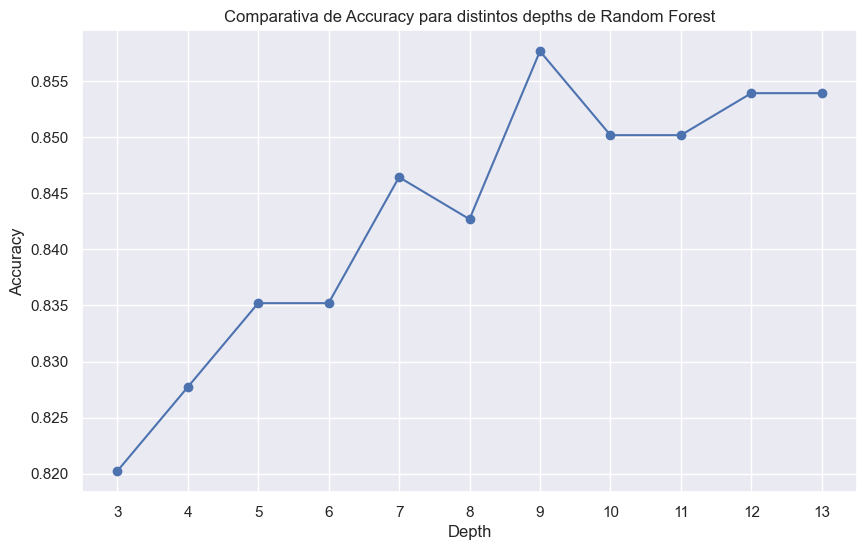

El accuracy varía en el rango del 82% al 85.52%. Se observa un aumento en el accuracy a medida que la profundidad aumenta desde 3 hasta 9, alcanzando su punto más alto en 83.52% para la profundidad de 9. A partir de ahí, el accuracy tiende a disminuye.

Sin embargo, esto fue con unos parametros limitados ya que solo variamos la profundidad de los arboles. Asi que lo siguiente que hicimos fue modificar estos hiperparámetros para mejorar el modelo. 

Uno de los problemas más fuertes que tenemos es el posible overfitting en el cual es tán fácil caer al momento de ahcer arboles por lo que eso mismo estamos buscando al modificar los parámetros. 

Al final, los parametros con los que nos quedamos fueron:
    - Número de arboles generado: 140
    - Profundidad: 9
    - Criterio de separación: Entropía
    - Minimo numero de muestras que cumplan para ser una hoja: 5

A continuación se muestra el primero de los arboles generados (son 140 asi que no se mostraran todos).

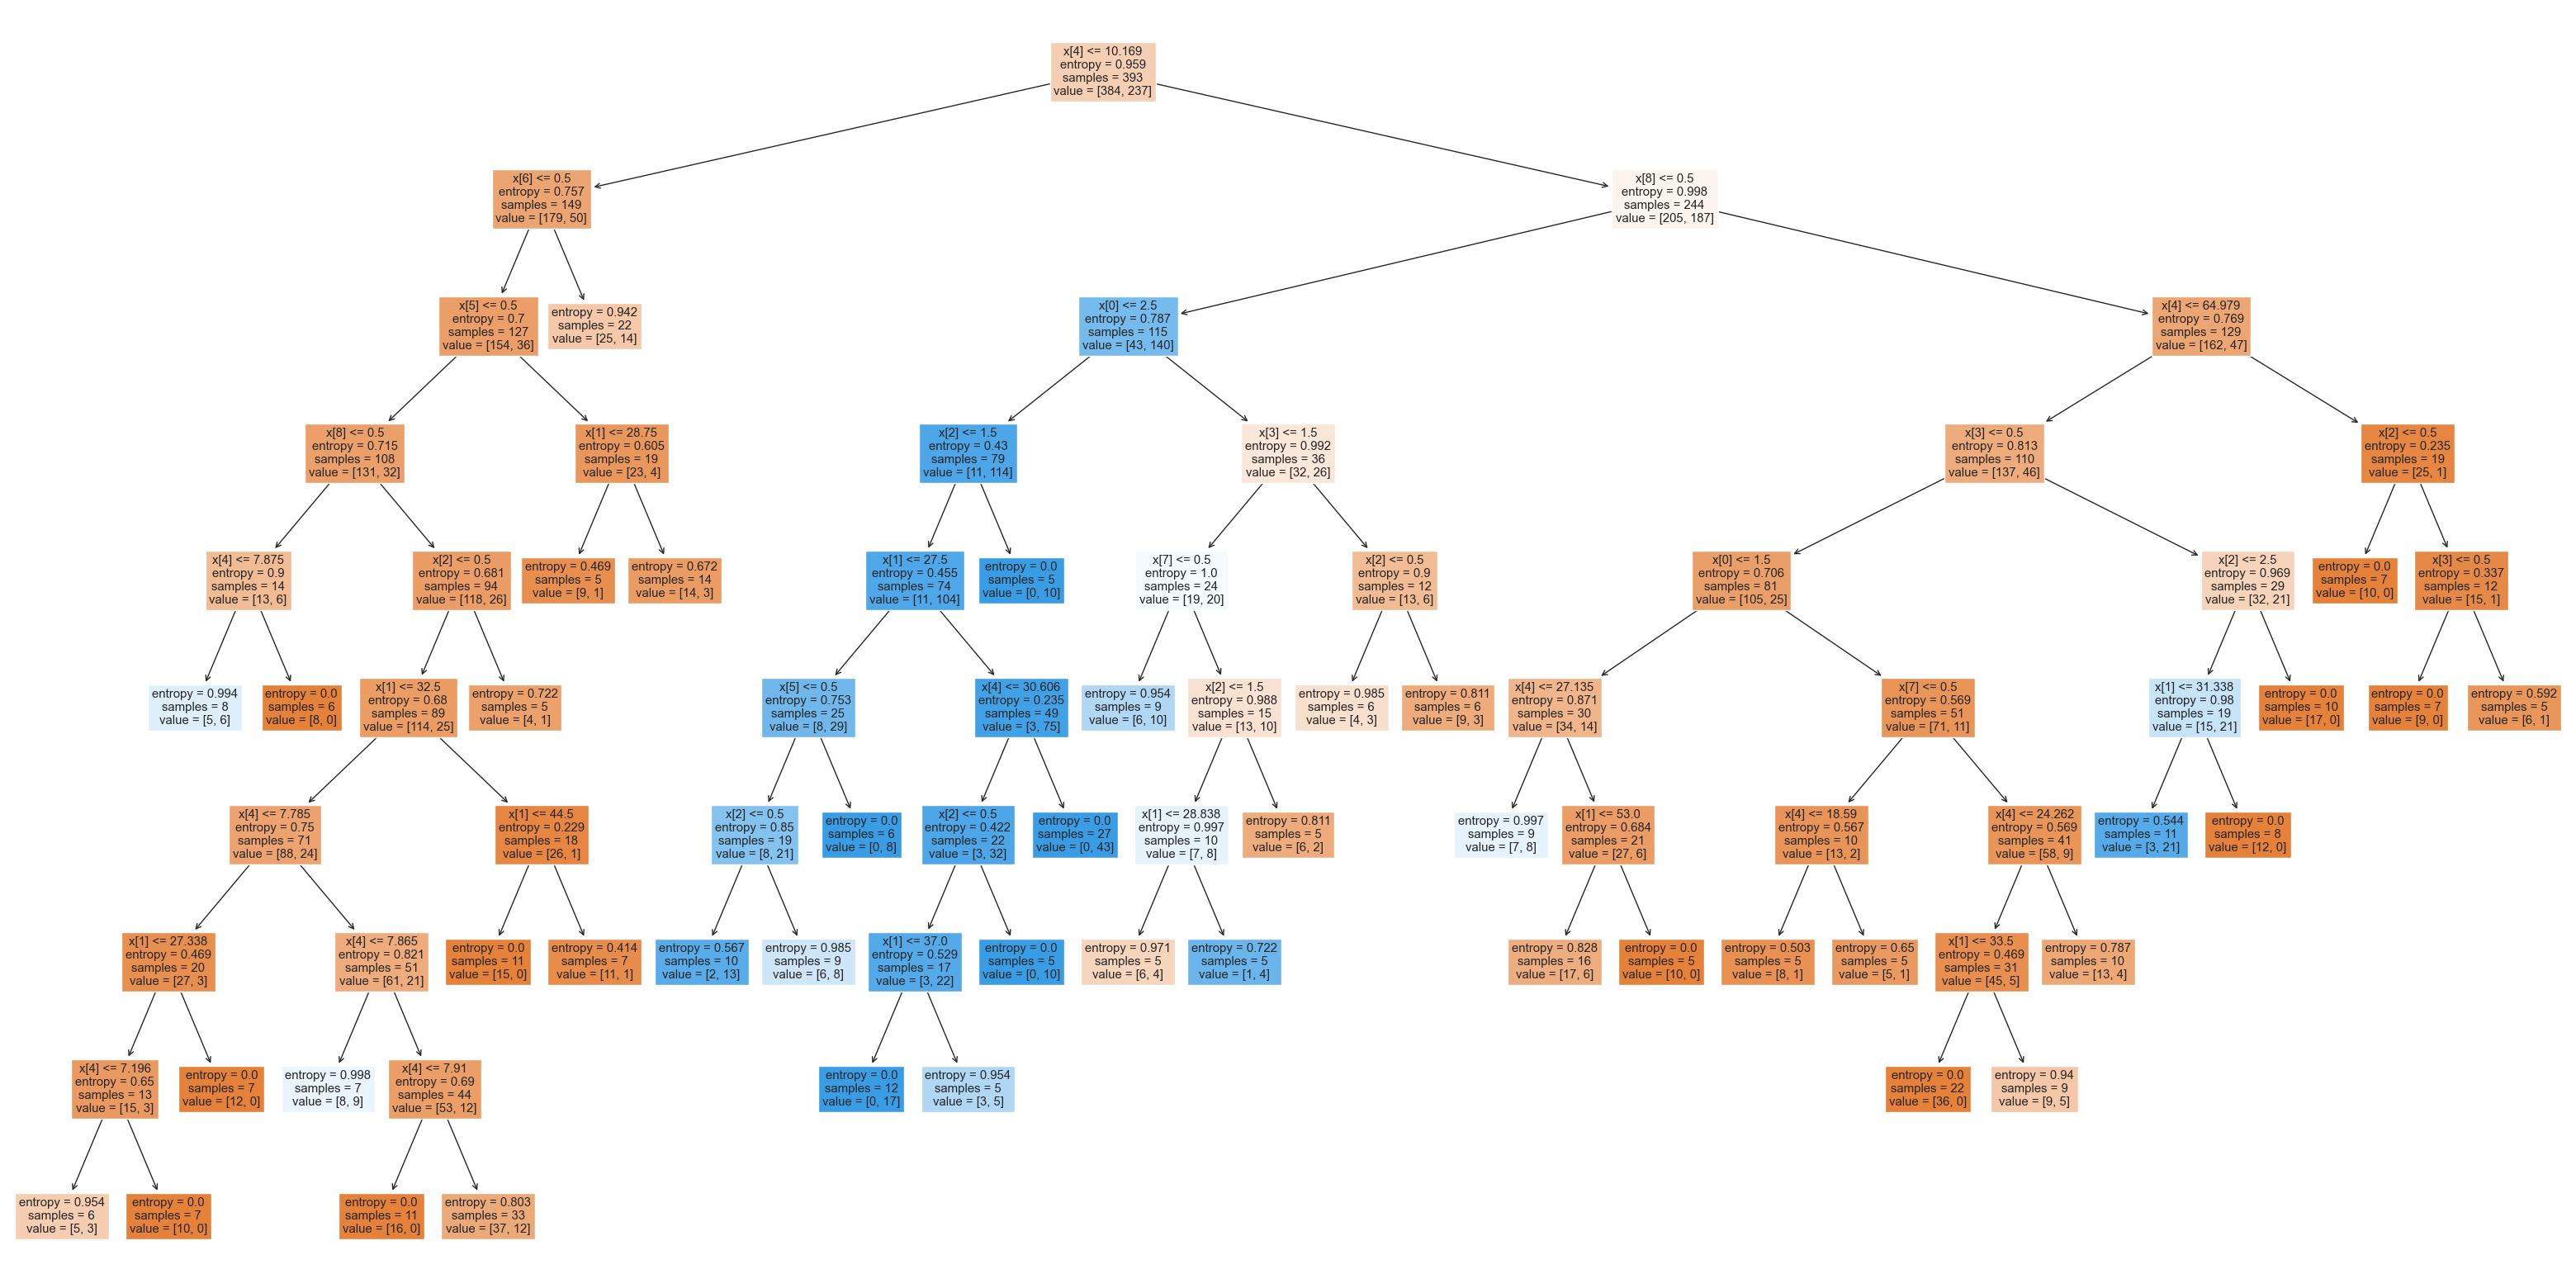

Aqui particularmente vemos una de las ramas que tiene una alta relacion con un resultado mientras que el resto es con el otro outcome. 

Al final obtuvimos un accuracy de 84.33%